In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('severstal-steel-defect-detection/train.csv')

In [3]:
df.head(3)

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN


In [5]:
df['imageid']=df.ImageId_ClassId.apply(lambda x: x.split('_')[0])
df['class']=df.ImageId_ClassId.apply(lambda x: x.split('_')[1])

In [6]:
df.head(10)

,ImageId_ClassId,EncodedPixels,imageid,class
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4
4,00031f466.jpg_1,NaN,00031f466.jpg,1
5,00031f466.jpg_2,NaN,00031f466.jpg,2
6,00031f466.jpg_3,NaN,00031f466.jpg,3
7,00031f466.jpg_4,NaN,00031f466.jpg,4
8,000418bfc.jpg_1,NaN,000418bfc.jpg,1
9,000418bfc.jpg_2,NaN,000418bfc.jpg,2


In [7]:
str(df['EncodedPixels'][1])=='nan'

True

In [8]:
import numpy as np
import math as m

In [10]:
class_list=[]
for i in range(0,len(df['EncodedPixels'])):
    if(str(df['EncodedPixels'][i])!='nan'):
        class_list.append(int(df['class'][i]))

In [11]:
count=0
class_list=[]
class_count=[]
multi_class=[]
dummy=[]
class_1=[]
class_2=[]
class_3=[]
class_4=[]

for i in range(0,len(df['EncodedPixels']),4):
    for k in range(0+i,4+i):
        if(str(df['EncodedPixels'][k])!='nan'):
            count+=1
            dummy.append(int(df['class'][k]))
            pass
        if(k==i+3 and count>=1):
            multi_class.append(dummy)
            class_count=class_count+dummy
            class_list.append(i)
            if(count==1):
                class_1.append(i)
                pass
            elif(count==2):
                class_2.append(i)
                pass
            elif(count==3):
                class_3.append(i)
                pass
            elif(count==4):
                class_4.append(i)
                pass
    count=0
    dummy=[]
    pass


0.5303946530872056 %  of the Images are Defective are
0.46960534691279443 %  of the Images are Non-Defective are


,class_types,class_count
Defect_classes,Defect_class,6666.0
Non_defect_classes,Non_defect_class,5902.0


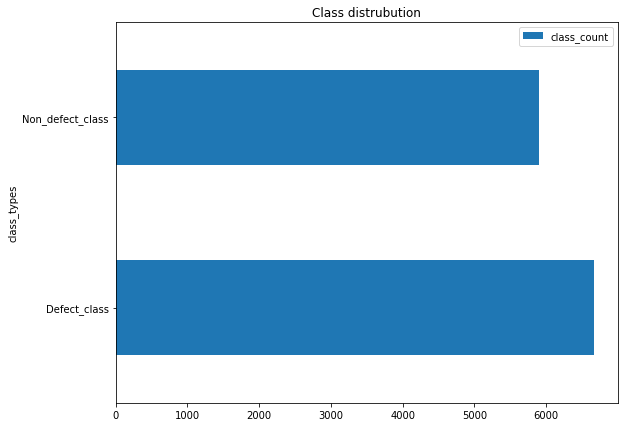

In [61]:
dff=pd.DataFrame({'class_types':['Defect_class','Non_defect_class'],'class_count':[len(class_list),(len(df)/4)-len(class_list)]},index=['Defect_classes','Non_defect_classes'])
dff.plot.barh(x='class_types',y='class_count',figsize=(9,7)).set_title('Class distrubution')
print('='*80)
print(len(class_list)/(len(df)/4),'%  of the Images are Defective are')
print(1-(len(class_list)/(len(df)/4)),'%  of the Images are Non-Defective are')

print('='*80)

dff

In [62]:
multi_class.count([1])+multi_class.count([2])+multi_class.count([3])+multi_class.count([4])+multi_class.count([1,2])+multi_class.count([1,3])+multi_class.count([1,4])+multi_class.count([2,3])+multi_class.count([2,4])+multi_class.count([3,4])+multi_class.count([1,2,3])+multi_class.count([1,2,3,4])+multi_class.count([2,3,4])

6666

--------------------------------------------------------------------------------
Majority class is Class_3 with 4759 Data points
Minority class is Class_2 with 195 Data points


,index,class_count
class_1,class1_Count,769
class_2,class2_Count,195
class_3,class3_Count,4759
class_4,class4_Count,516


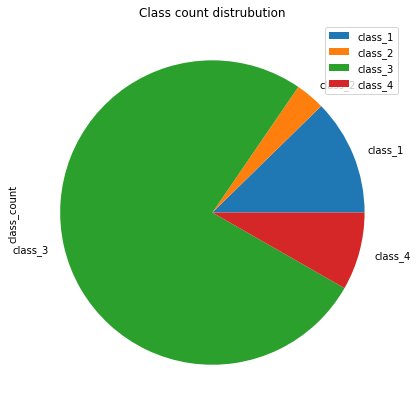

In [67]:
pf=pd.DataFrame({'index':['class1_Count','class2_Count','class3_Count','class4_Count'],'class_count':[multi_class.count([1]),multi_class.count([2]),multi_class.count([3]),multi_class.count([4])]},index=['class_1','class_2','class_3','class_4'])
pf.plot.pie(x='index',y='class_count',figsize=(9,7)).set_title('Class count distrubution')
print('-'*80)
print('Majority class is Class_3 with',pf['class_count'].max(),'Data points')
print('Minority class is Class_2 with',pf['class_count'].min(),'Data points')

print('='*80)
print('='*80)
pf


### Classes which belong to multiple class

In [164]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names =["Type", "No.of.classes","Class Id's","Class Data",'Total_Data','~% of Data']
table.add_row(['one class',4,[[1],[2],[3],[4]],[len(class_1),len(class_2),len(class_3),len(class_4)],len(class_1),float(str(len(class_1)*100/(len(df)/4))[:6]) ])
t=(multi_class.count([1,2])+multi_class.count([1,3])+multi_class.count([2,3])+multi_class.count([2,4])+multi_class.count([3,4]))
table.add_row(['two class',5,[[1,2],[1,3],[2,3],[2,4],[3,4]],[multi_class.count([1,2]),multi_class.count([1,3]),multi_class.count([2,3]),multi_class.count([2,4]),multi_class.count([3,4])],t,float(str((t*100/(len(df)/4)))[:6])])
table.add_row(['Three class',1,[[1,2,3]],len(class_3), len(class_3),float(str(len(class_3)*100/(len(df)/4))[:6])])
table.add_row(['four class',0,np.nan,np.nan, len(class_4),float(str(len(class_4)*100/(len(df)/4))[:6])])


In [165]:
print(table)

+-------------+---------------+------------------------------------------+----------------------+------------+------------+
|     Type    | No.of.classes |                Class Id's                |      Class Data      | Total_Data | ~% of Data |
+-------------+---------------+------------------------------------------+----------------------+------------+------------+
|  one class  |       4       |           [[1], [2], [3], [4]]           |  [6239, 425, 2, 0]   |    6239    |   49.641   |
|  two class  |       5       | [[1, 2], [1, 3], [2, 3], [2, 4], [3, 4]] | [35, 91, 14, 1, 284] |    425     |   3.3816   |
| Three class |       1       |               [[1, 2, 3]]                |          2           |     2      |   0.0159   |
|  four class |       0       |                   nan                    |         nan          |     0      |    0.0     |
+-------------+---------------+------------------------------------------+----------------------+------------+------------+
